# Vizualization

## 1. Import 

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
plt.rcParams["figure.figsize"] = (20,3)

## 2. Creating figures and axes

In [17]:
x = np.linspace(-4, 4, 100)
y = np.sin(x)

### 2.1. Just plot

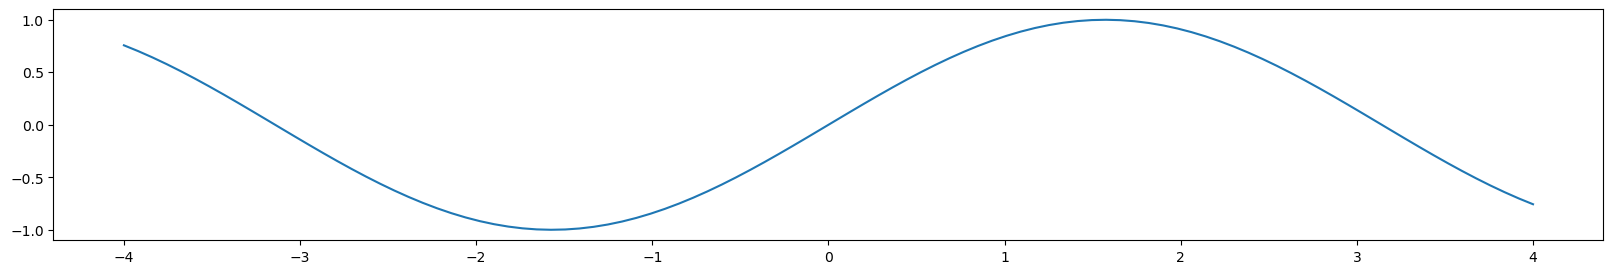

In [18]:
plt.plot(x, y);

### 2.2. Create figure 

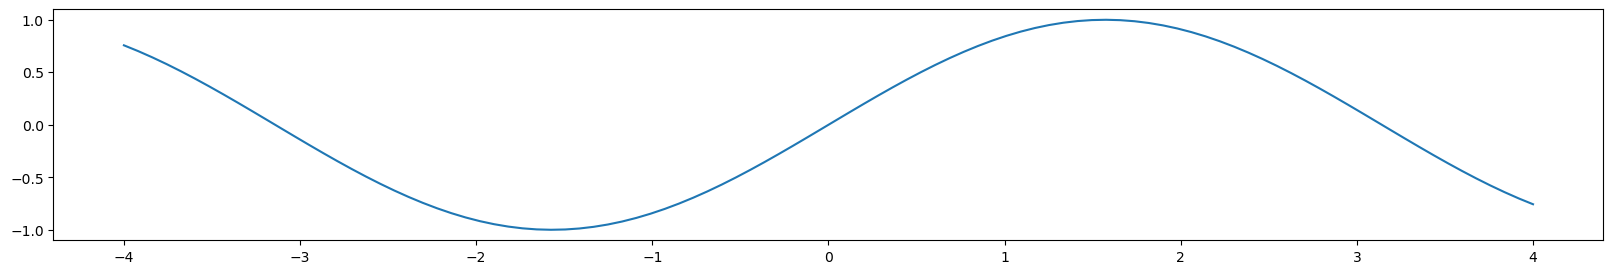

In [19]:
fig = plt.figure()
plt.plot(x,y);

### 2.3. Creating subplots

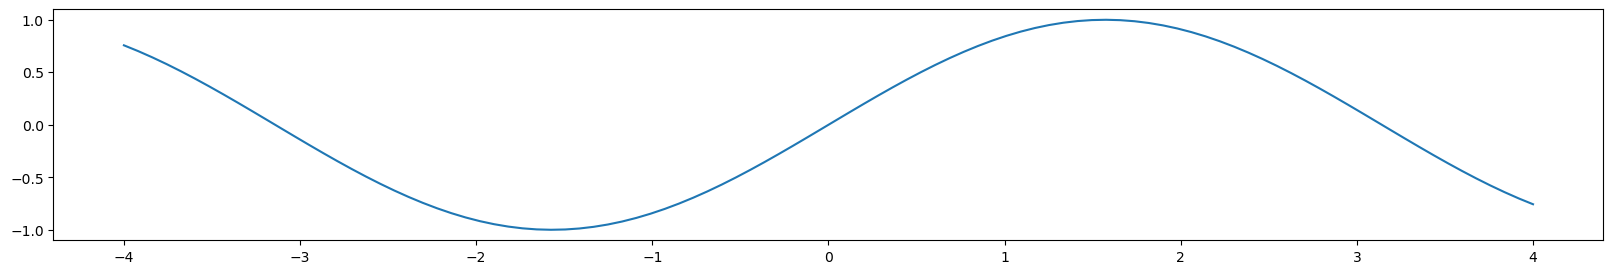

In [20]:
row = 1
col = 1
fig, ax = plt.subplots(row, col)
plt.plot(x,y);

#### Stateful interface

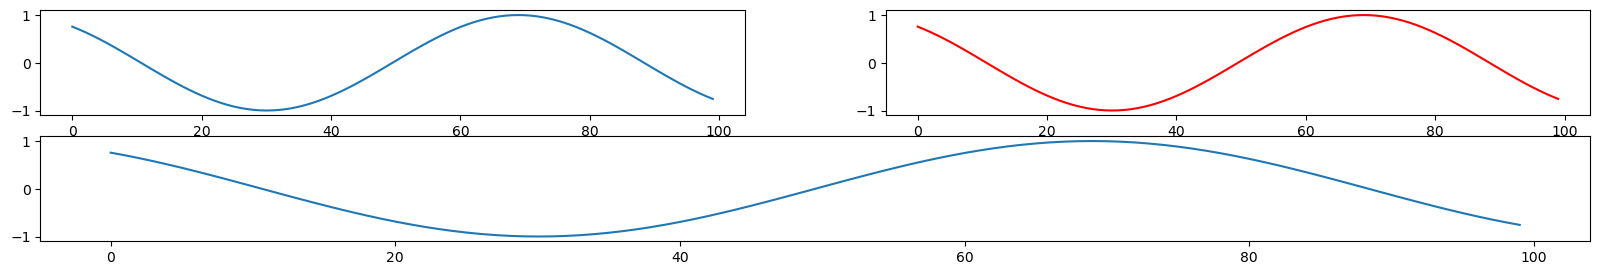

In [34]:
plt.subplot(2,2,1)
plt.plot(y)
plt.subplot(2,2,2)
plt.plot(y, c='r')
plt.subplot(2,1,2)
plt.plot(y);

You can change figure with functions:
- plt.title
- plt.xlim
- plt.ylim
- plt.xlabel
- plt.ylabel
- plt.xticks
- plt.yticks

#### Objected oriented interface

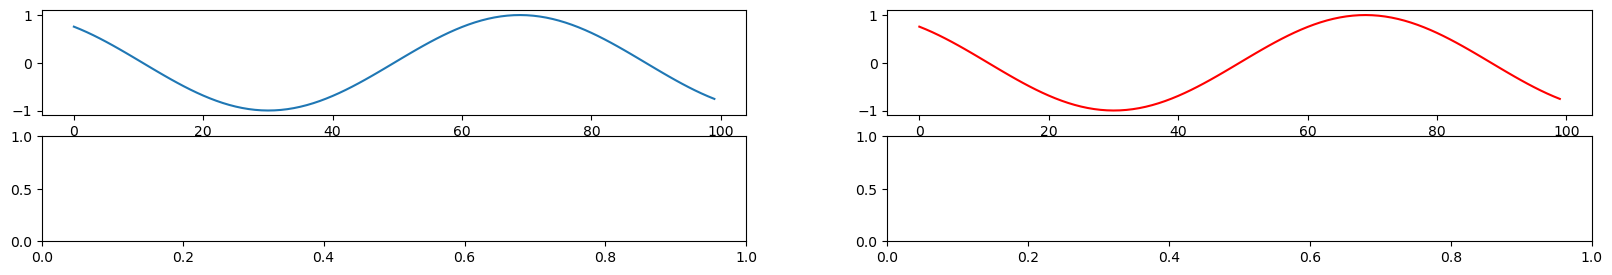

In [29]:
fig, axes = plt.subplots(2,2)
axes[0,0].plot(y)
axes[0,1].plot(y, c='r');

You can change figure with functions:
- ax.set_title
- ax.set_xlim
- ax.set_ylim
- ax.set_xlabel
- ax.set_ylabel
- ax.set_xticks
- ax.set_yticks
- ax.set_xtick_labels

## 3. Plotting commands

### 3.1. Plot

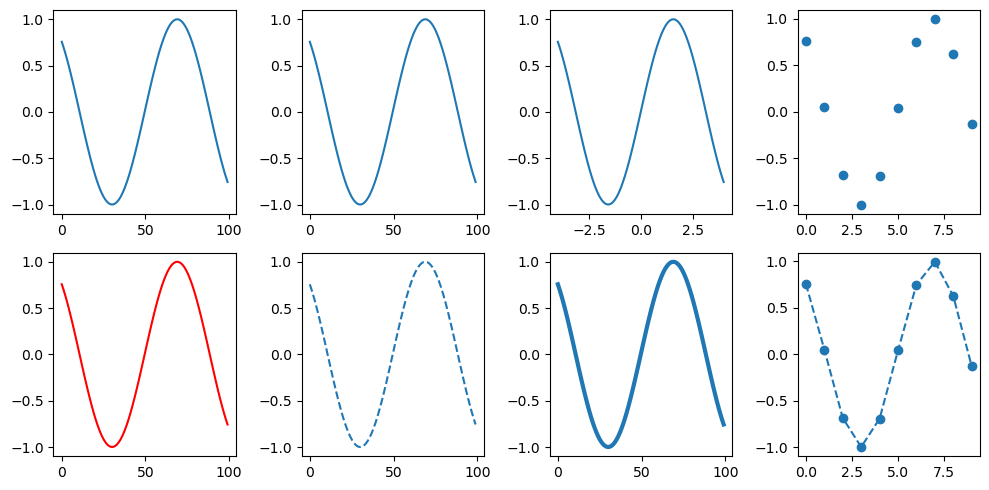

In [39]:
fig, axes = plt.subplots(2,4, figsize=(10,5))
axes[0,0].plot(y)
axes[0,1].plot(range(100), y) # same as above
axes[0,2].plot(np.linspace(-4, 4, 100), y)
axes[0,3].plot(y[::10], 'o')
axes[1,0].plot(y, c='r')
axes[1,1].plot(y, '--')
axes[1,2].plot(y, lw=3)
axes[1,3].plot(y[::10], '--o')
plt.tight_layout()

### 3.2. Scatter

In [119]:
mu_first = [0, 0]
cov_first = [[1, 2], [1/6, 2]]

x,y = np.random.multivariate_normal(mu_first, cov_first, 100).T
sizes = np.random.randint(20,40,100)

C:\Users\Misha\AppData\Local\Temp\ipykernel_6664\2446644952.py:4: RuntimeWarning: covariance is not positive-semidefinite.
  x,y = np.random.multivariate_normal(mu_first, cov_first, 100).T


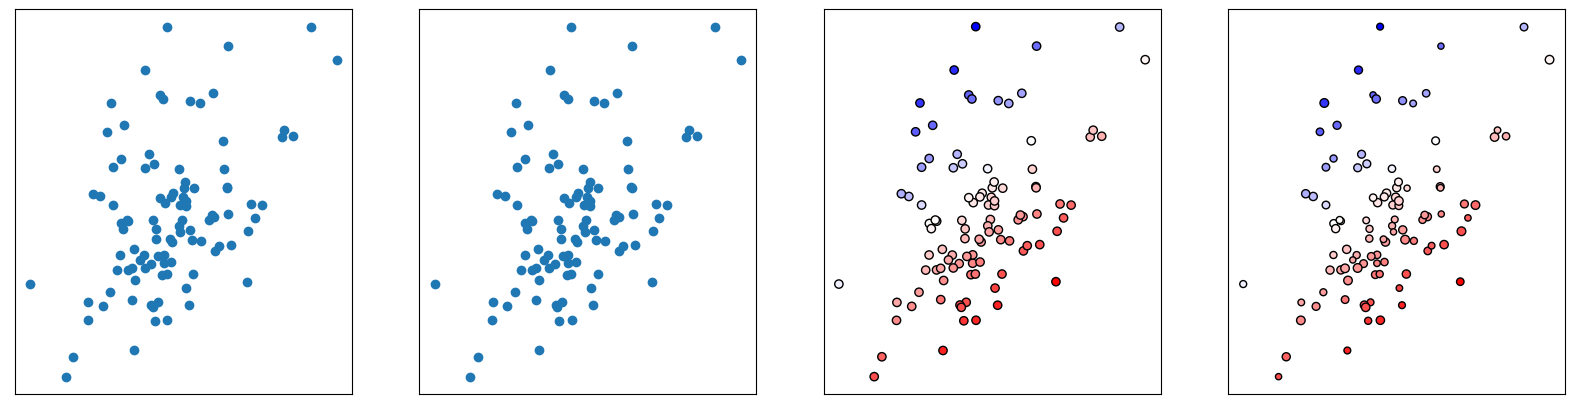

In [122]:
fig, axes = plt.subplots(1,4, figsize=(20,5),
                         subplot_kw={'xticks':(), 'yticks':()})
axes[0].plot(x, y, 'o')
axes[1].scatter(x, y)
axes[2].scatter(x, y, c=x-y, cmap='bwr', edgecolor='k')
axes[3].scatter(x, y, c=x-y, s=sizes, cmap='bwr', edgecolor='k');

### 3.3. Histogram

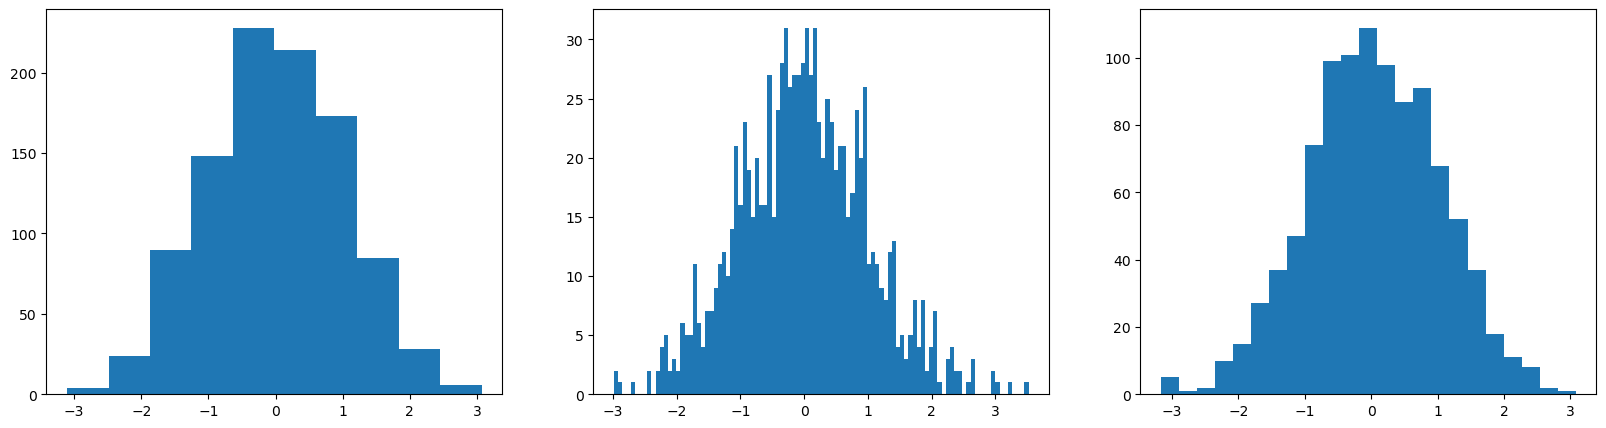

In [124]:
fig, axes = plt.subplots(1,3, figsize=(20,5),)
axes[0].hist(np.random.normal(size=1000))
axes[1].hist(np.random.normal(size=1000), bins=100)
axes[2].hist(np.random.normal(size=1000), bins='auto');